In [4]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
with open('../tracker_stubs/ball_detection.pkl', 'rb') as f:
    ball_positions = pickle.load(f)

In [8]:
ball_positions = [x.get(1,[]) for x in ball_positions]
        # convert the list into pandas dataframe
df_ball_positions = pd.DataFrame(ball_positions,columns=['x1','y1','x2','y2'])

        # interpolate the missing values
df_ball_positions = df_ball_positions.interpolate()
df_ball_positions = df_ball_positions.bfill()

In [10]:
df_ball_positions['mid_y'] = (df_ball_positions['y1'] + df_ball_positions['y2'])/2
df_ball_positions['mid_y_rolling_mean'] = df_ball_positions['mid_y'].rolling(window=5, min_periods=1, center=False).mean()

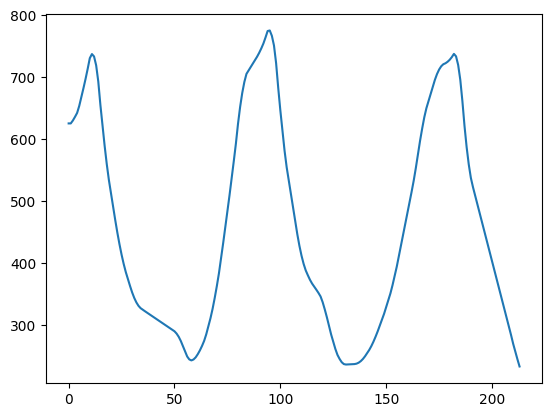

In [13]:
# plot mid_y_rolling_mean
plt.plot(df_ball_positions['mid_y_rolling_mean'])

In [14]:
df_ball_positions['delta_y'] = df_ball_positions['mid_y_rolling_mean'].diff()

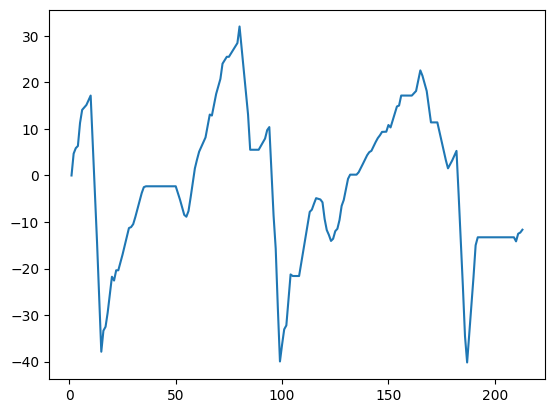

In [15]:
# plot mid_y_rolling_mean
plt.plot(df_ball_positions['delta_y'])

In [16]:
df_ball_positions['ball_hit']=0

In [17]:
minimum_change_frames_for_hit = 25
for i in range(1,len(df_ball_positions)- int(minimum_change_frames_for_hit*1.2) ):
    negative_position_change = df_ball_positions['delta_y'].iloc[i] >0 and df_ball_positions['delta_y'].iloc[i+1] <0
    positive_position_change = df_ball_positions['delta_y'].iloc[i] <0 and df_ball_positions['delta_y'].iloc[i+1] >0

    if negative_position_change or positive_position_change:
        change_count = 0 
        for change_frame in range(i+1, i+int(minimum_change_frames_for_hit*1.2)+1):
            negative_position_change_following_frame = df_ball_positions['delta_y'].iloc[i] >0 and df_ball_positions['delta_y'].iloc[change_frame] <0
            positive_position_change_following_frame = df_ball_positions['delta_y'].iloc[i] <0 and df_ball_positions['delta_y'].iloc[change_frame] >0

            if negative_position_change and negative_position_change_following_frame:
                change_count+=1
            elif positive_position_change and positive_position_change_following_frame:
                change_count+=1
    
        if change_count>minimum_change_frames_for_hit-1:
            df_ball_positions['ball_hit'].iloc[i] = 1

frame_nums_with_ball_hits = df_ball_positions[df_ball_positions['ball_hit']==1].index.tolist()

C:\Users\Kaush\AppData\Local\Temp\ipykernel_34532\3752280353.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ball_positions['ball_hit'].iloc[i] = 1
C:\Users\Kaush\AppData\Local\Temp\ipykernel_34532\3752280353.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ball_positions['ball_hit'].iloc[i] = 1
C:\Users\Kaush\AppData\Local\Temp\ipykernel_34532\3752280353.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ball_posit

In [19]:
df_ball_positions

,x1,y1,x2,y2,mid_y,mid_y_rolling_mean,delta_y,ball_hit
0,895.454041,616.129700,911.710693,634.020569,625.075134,625.075134,NaN,0
1,895.454041,616.129700,911.710693,634.020569,625.075134,625.075134,0.000000,0
2,880.914075,630.481738,896.759949,647.863318,639.172528,629.774266,4.699131,0
3,866.374109,644.833777,881.809204,661.706067,653.269922,635.648180,5.873914,0
4,851.834143,659.185815,866.858459,675.548816,667.367316,641.992007,6.343827,0
...,...,...,...,...,...,...,...,...
209,1184.979858,247.877884,1199.490845,265.231201,256.554543,283.114248,-13.279853,0
210,1184.881470,232.816147,1196.261353,244.988724,238.902435,268.959944,-14.154304,0
211,1184.068237,226.247955,1197.245728,241.382721,233.815338,256.444192,-12.515753,0
212,1180.170410,214.140472,1194.881470,229.481049,221.810760,244.183494,-12.260698,0


In [18]:
df_ball_positions[df_ball_positions['ball_hit']==1]

,x1,y1,x2,y2,mid_y,mid_y_rolling_mean,delta_y,ball_hit
11,777.972107,717.838806,796.685852,739.078491,728.458649,737.068301,6.579309,1
58,926.006030,240.594699,939.068481,253.923105,247.258902,242.324698,-1.596962,1
95,624.725372,749.244232,641.136383,766.280823,757.762527,775.167935,0.889285,1
131,716.346527,229.184288,729.521179,242.902527,236.043407,235.683077,-0.723660,1
182,1296.037109,740.427795,1314.294922,758.785583,749.606689,737.401254,5.286462,1
